In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error


In [4]:
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [31]:
df.select_dtypes(include="object")

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [9]:
df["fueltype"].unique()

array(['gas', 'diesel'], dtype=object)

In [26]:
.unique()df["enginelocation"]

array(['front', 'rear'], dtype=object)

In [21]:
df["aspiration"].unique()

array(['std', 'turbo'], dtype=object)

In [25]:
df["drivewheel"].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [22]:
df["doornumber"].unique()

array(['two', 'four'], dtype=object)

In [23]:
# df["carbody"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [24]:
df["cylindernumber"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [27]:
# df["enginetype"].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [28]:
# df["fuelsystem"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [32]:
df["fueltype"].replace({"gas":3,"diesel":6},inplace=True)
df["enginelocation"].replace({"front":5,"rear":4},inplace=True)
df["cylindernumber"].replace({'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8},inplace=True)
df["doornumber"].replace({'two':2, 'four':4},inplace=True)
df["drivewheel"].replace({'rwd':9, 'fwd':1, '4wd':4},inplace=True)
df["aspiration"].replace({'std':1, 'turbo':10},inplace=True)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    int64  
 4   aspiration        205 non-null    int64  
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    int64  
 8   enginelocation    205 non-null    int64  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [38]:
len(df.select_dtypes(include=["int64","float64"]).columns)

22

In [39]:
num_col=df.select_dtypes(include=["int64","float64"])
corr_matrix=num_col.corr()
corr_matrix

,car_ID,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.125568,0.067729,0.190352,0.090791,-0.051483,0.129729,0.170636,0.052387,...,-0.094493,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.194311,-0.059866,-0.664073,-0.088275,-0.212471,-0.531954,-0.357612,-0.232919,...,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
fueltype,0.125568,-0.194311,1.000000,0.401397,0.191491,0.112356,0.040070,0.308346,0.212679,0.233880,...,-0.024544,0.069594,0.054451,0.241829,0.984356,-0.163926,-0.476883,0.255963,0.191392,0.105679
aspiration,0.067729,-0.059866,0.401397,1.000000,0.031792,0.127755,0.057191,0.257611,0.234539,0.300567,...,-0.047972,0.108217,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,0.190352,-0.664073,0.191491,0.031792,1.000000,-0.059882,0.137757,0.447357,0.398568,0.207168,...,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
drivewheel,0.090791,-0.088275,0.112356,0.127755,-0.059882,1.000000,-0.156750,0.494582,0.538388,0.506949,...,0.347068,0.559336,0.589870,-0.062383,0.090954,0.575808,-0.102890,-0.564480,-0.591709,0.638276
enginelocation,-0.051483,-0.212471,0.040070,0.057191,0.137757,-0.156750,1.000000,0.187790,0.050989,0.051698,...,-0.183048,-0.196826,-0.185042,0.138455,0.019762,-0.317839,-0.198461,0.153487,0.102026,-0.324973
wheelbase,0.129729,-0.531954,0.308346,0.257611,0.447357,0.494582,0.187790,1.000000,0.874587,0.795144,...,0.339507,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.212679,0.234539,0.398568,0.538388,0.050989,0.874587,1.000000,0.841118,...,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.233880,0.300567,0.207168,0.506949,0.051698,0.795144,0.841118,1.000000,...,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325


<Axes: >

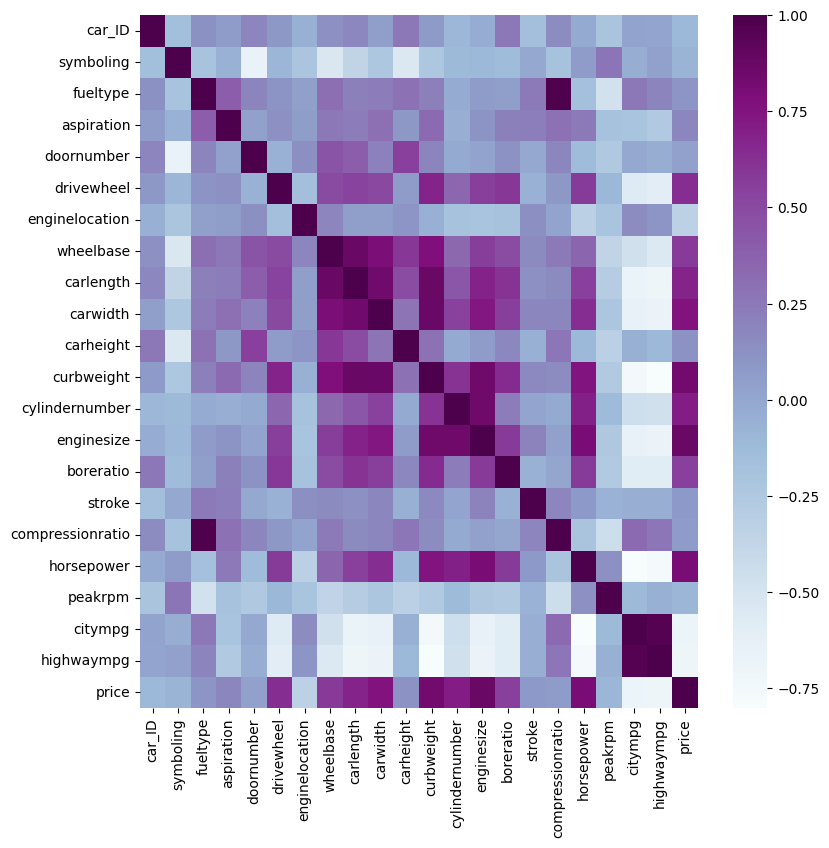

In [56]:
fig=plt.figure(figsize=(9,9))
sns.heatmap(corr_matrix,cmap="BuPu")


In [58]:
imp_cols=["fueltype","carlength","carwidth","citympg","highwaympg","enginesize","price","curbweight","horsepower","wheelbase","cylindernumber"]
imp_cols

['fueltype',
 'carlength',
 'carwidth',
 'citympg',
 'highwaympg',
 'enginesize',
 'price',
 'curbweight',
 'horsepower',
 'wheelbase',
 'cylindernumber']

In [60]:
training_data=df[imp_cols]
training_data.shape

(205, 11)

In [61]:
X=training_data.drop(columns=["price"])
y=training_data["price"]

In [62]:
X_train=training_data.drop(columns=["price"])
y_train=training_data["price"]

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [97]:
y_test.shape

(62,)

In [98]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.fit(X_test,y_test)

LinearRegression()

In [99]:
pred_y_train=lr.predict(X_train)
pred_y_test=lr.predict(X_test)
pred_y_train.shape


(143,)

In [100]:
lr.predict(X_train[1:3])

array([14638.12534705, 19991.78005956])

In [101]:
MAE_train=mean_absolute_error(y_train,pred_y_train)
# MAE_test=mean_absolute_error(y_test,pred_y_test)

In [102]:
print(MAE_test)

2104.0121804736245


In [105]:
mean_absolute_percentage_error(y_test,pred_y_test)

0.1677384803013986